In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

# Cleaning the data

## Cleaning the My Anime List Reviews dataset

In [2]:
# Loading reviews and rating scraped from the My Anime List website. 
# I put the scrapy spiders used for that puropse in the repository.
df = pd.read_csv("myAnimeListReviews/reviews.csv")

C:\Users\SmilingAtheist\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df.shape)
df.head()

(99944, 8)


,Rating,Enjoyment,Sound,review_text,Animation,Character,Story,Name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r\n Top\r\n ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Next
2,8,6.0,9,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,9,7.0,6,Nyanbo!
3,7,5.0,6,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,6,7.0,6,Boku no Pico
4,10,10.0,10,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,10,10.0,9,Kimi no Na wa.


In [4]:
df = df[["Name", "review_text", "Rating", "Story", "Animation", "Sound", "Character", "Enjoyment"]]

In [5]:
df.head()

,Name,review_text,Rating,Story,Animation,Sound,Character,Enjoyment
0,\r\n Top\r\n ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Next,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nyanbo!,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,8,6,9,9,7.0,6.0
3,Boku no Pico,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,7,6,6,6,7.0,5.0
4,Kimi no Na wa.,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,10,9,10,10,10.0,10.0


In [6]:
df.isnull().sum()

Name            3702
review_text     7404
Rating          7404
Story          10540
Animation      10584
Sound          11076
Character      10637
Enjoyment      11115
dtype: int64

In [7]:
df.dropna().shape

(88385, 8)

In [8]:
# Let's drop all rows with nan values
df = df.dropna()

In [9]:
df.isnull().sum()

Name           0
review_text    0
Rating         0
Story          0
Animation      0
Sound          0
Character      0
Enjoyment      0
dtype: int64

In [10]:
df.dtypes

Name            object
review_text     object
Rating          object
Story           object
Animation       object
Sound           object
Character      float64
Enjoyment      float64
dtype: object

In [11]:
# the comma is preventing us from converting to float
df[df["Story"].astype(str).map(lambda x: ',' in x)]

,Name,review_text,Rating,Story,Animation,Sound,Character,Enjoyment
14490,Toradora!,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,6,"5,6",6,6,7.0,8.0
14858,Akame ga Kill!,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,5,"5,4",5,8,3.0,5.0
59124,Heart no Kuni no Alice: Wonderful Wonder World,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,8,"1,9",10,10,10.0,9.0


In [12]:
# Here we're droping the numeric rows with commas
columns = ["Rating", "Story", "Animation", "Sound"]

for col in columns:
    df = df[df[col].astype(str).map(lambda x: ',' not in x)]
    df[col] = df[col].astype(float)

In [13]:
df.dtypes, df.shape

(Name            object
 review_text     object
 Rating         float64
 Story          float64
 Animation      float64
 Sound          float64
 Character      float64
 Enjoyment      float64
 dtype: object, (88255, 8))

In [14]:
columns = ["Name", "review_text"]

for col in columns:
    df[col] = df[col].astype(str)

In [15]:
df.dtypes, df.shape

(Name            object
 review_text     object
 Rating         float64
 Story          float64
 Animation      float64
 Sound          float64
 Character      float64
 Enjoyment      float64
 dtype: object, (88255, 8))

In [16]:
col = "Name"

df[df[col].map(lambda x: type(x) is not str)]

,Name,review_text,Rating,Story,Animation,Sound,Character,Enjoyment


In [17]:
col = "review_text"

df[df[col].map(lambda x: type(x) is not str)]

,Name,review_text,Rating,Story,Animation,Sound,Character,Enjoyment


In [18]:
# column 'review_text' renamed to 'Review'
df.rename(columns={'review_text':'Review'}, inplace=True)

In [19]:
df.head()

,Name,Review,Rating,Story,Animation,Sound,Character,Enjoyment
2,Nyanbo!,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,8.0,6.0,9.0,9.0,7.0,6.0
3,Boku no Pico,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,7.0,6.0,6.0,6.0,7.0,5.0
4,Kimi no Na wa.,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,10.0,9.0,10.0,10.0,10.0,10.0
5,Cheonnyeon-yeowoo Yeowoobi,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,6.0,6.0,7.0,5.0,7.0,6.0
6,Noragami,\r\n\t\t\t\t\t\r\n \r\n\t\t\t\t\t ...,7.0,7.0,10.0,10.0,7.0,7.0


In [20]:
df.dtypes, df.shape

(Name          object
 Review        object
 Rating       float64
 Story        float64
 Animation    float64
 Sound        float64
 Character    float64
 Enjoyment    float64
 dtype: object, (88255, 8))

In [21]:
df.describe()

,Rating,Story,Animation,Sound,Character,Enjoyment
count,88255.000000,88255.000000,88255.000000,88255.000000,88255.000000,88255.000000
mean,7.561759,7.181723,7.935528,7.845606,7.441119,7.746247
std,2.225516,2.400374,1.830413,1.881528,2.463746,2.425485
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,6.000000,7.000000,7.000000,6.000000,7.000000
50%,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
75%,9.000000,9.000000,9.000000,9.000000,9.000000,10.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [22]:
# Everythig looks ok now.
df1 = df

## Cleaning the Anime News Newtwork Reviews dataset

In [23]:
# Loading reviews and rating scraped from the Anime News Network website. 
# I put the scrapy spiders in the repository.
df = pd.read_csv("AnimeNewsNetworkReviews/reviews.csv")

In [24]:
df.head()

,Name2,Review,Synopsis,Good_points,Ratings,Name,Bad_points
0,GN 7,"\r\n,\r\nA Silent Voice reached its climax at ...","At last, Shoya has woken up. Racing to the bri...",Maintains A Silent Voice's usual acuity of ar...,"{'Overall': 'B+', 'Art': 'A-', 'Story': 'B-'}",A Silent Voice,"Feels a bit overlong in its resolutions, and ..."
1,DVD 1,"\r\n,\r\nTo fully and correctly appreciate 009...",In a world where the Cold War continues well p...,"Musical score, fan service.","{'Animation': 'B-', 'Overall (dub)': 'B', 'Mus...",009-1,"Some character designs are appallingly ugly, ..."
2,Sub.Blu-Ray,"\r\n,\r\nWhat happens when you take twenty-sev...",Haruto can't bring himself to accept that his ...,"Some great voice work and nice animation, tri...","{'Animation': 'B', 'Overall (sub)': 'C', 'Musi...",A Town Where You Live,Story comes off melodramatic without much emo...
3,GN 6,"\r\n,\r\nIt's always an interesting experience...","Seeing Shoko about to leap off her balcony, Sh...",Doubles down on the manga's terrific characte...,"{'Overall': 'A', 'Art': 'A-', 'Story': 'A'}",A Silent Voice,A couple dramatic points felt a little loosel...
4,GN 4,"\r\n,\r\nIt feels like A Silent Voice's densit...",Things continue to change little by little for...,Continues to demonstrate wondrously poignant ...,"{'Overall': 'A-', 'Art': 'B', 'Story': 'A'}",A Silent Voice,Some dramatic developments here could have us...


In [25]:
df = df[["Name", "Name2", "Ratings", "Synopsis", "Review" ,"Good_points", "Bad_points"]]

In [26]:
df.head()

,Name,Name2,Ratings,Synopsis,Review,Good_points,Bad_points
0,A Silent Voice,GN 7,"{'Overall': 'B+', 'Art': 'A-', 'Story': 'B-'}","At last, Shoya has woken up. Racing to the bri...","\r\n,\r\nA Silent Voice reached its climax at ...",Maintains A Silent Voice's usual acuity of ar...,"Feels a bit overlong in its resolutions, and ..."
1,009-1,DVD 1,"{'Animation': 'B-', 'Overall (dub)': 'B', 'Mus...",In a world where the Cold War continues well p...,"\r\n,\r\nTo fully and correctly appreciate 009...","Musical score, fan service.","Some character designs are appallingly ugly, ..."
2,A Town Where You Live,Sub.Blu-Ray,"{'Animation': 'B', 'Overall (sub)': 'C', 'Musi...",Haruto can't bring himself to accept that his ...,"\r\n,\r\nWhat happens when you take twenty-sev...","Some great voice work and nice animation, tri...",Story comes off melodramatic without much emo...
3,A Silent Voice,GN 6,"{'Overall': 'A', 'Art': 'A-', 'Story': 'A'}","Seeing Shoko about to leap off her balcony, Sh...","\r\n,\r\nIt's always an interesting experience...",Doubles down on the manga's terrific characte...,A couple dramatic points felt a little loosel...
4,A Silent Voice,GN 4,"{'Overall': 'A-', 'Art': 'B', 'Story': 'A'}",Things continue to change little by little for...,"\r\n,\r\nIt feels like A Silent Voice's densit...",Continues to demonstrate wondrously poignant ...,Some dramatic developments here could have us...


In [27]:
df.isnull().sum()

Name            12
Name2          257
Ratings          0
Synopsis         0
Review           0
Good_points     32
Bad_points      35
dtype: int64

In [28]:
df.dtypes, df.shape

(Name           object
 Name2          object
 Ratings        object
 Synopsis       object
 Review         object
 Good_points    object
 Bad_points     object
 dtype: object, (4174, 7))

In [29]:
col = "Bad_points"

df[df[col].map(lambda x: type(x) is not str)].head(4)

,Name,Name2,Ratings,Synopsis,Review,Good_points,Bad_points
11,Zero Time Dilemma,PS Vita,"{'Music': 'A-', 'Graphics': 'B', 'Overall': 'A...",The latest installment in Kotaro Uchikoshi's a...,"\r\n,\r\nZero Time Dilemma is a game that almo...",NaN,NaN
114,Etrian Odyssey IV: Legends of the Titan,Nintendo 3DS,"{'Music': 'A-', 'Graphics': 'A-', 'Overall': '...",The fourth Etrian Odyssey brings back most of ...,"\r\n,\r\nAnyone would be wary of a series that...",Series-standard Etrian Odyssey gameplay marri...,NaN
159,Anime,A Guide to Japanese Animation (1958-1988),{},"Soft Cover,\r\n320 pages,\r\nBlack & White,\r\...","""Anime, A guide to Japanese Animation"" was fir...",NaN,NaN
260,X TV,[ONE],"{'Animation': 'B+', 'Overall (dub)': 'B', 'Mus...","In the first volume of X, the Dragons of the E...",The long awaited X television series is finall...,NaN,NaN


In [30]:
df2 = df # not much cleaning needed

# Preprocessing the text data and the ratings data

## Preprocessing text

In [31]:
# Defining how do we want to preprocess the text for machine learning
from nltk import word_tokenize

def preprocess_text(text):
    if not pd.isnull(text):
        text = re.sub(r'\n|\t|\r', r' ', text, flags = re.DOTALL) #removing \n, \t and \r
        text = re.sub(r' +', r' ', text) #multiple spaces to one space
        text = re.sub(r'\d+', r'', text) # we really don't want to have '9/10' as the most important feature
        text = text.lower()
        text = word_tokenize(text)   
    
    return text

In [32]:
print( preprocess_text(df1.loc[5, "Review"]) )

['i', 'really', 'wanted', 'to', 'like', 'this', 'movie', '.', 'i', 'really', 'really', 'did', '.', 'it', 'has', 'all', 'the', 'ingredients', 'i', 'like', '.', 'fantasy/magic', ',', 'an', 'isolated', 'character', 'interacting', 'with', 'the', "'real", 'world', "'", 'for', 'the', 'first', 'time', ',', 'a', 'mix', 'of', 'comedy', '(', 'slapstick', 'and', 'cerebral', ')', ',', 'drama', ',', 'aliens', ',', 'and', 'a', 'ghost', 'sink', '.', 'i', 'do', "n't", 'know', 'if', 'it', 'was', 'the', 'subtle', 'differences', 'between', 'korean', 'and', 'japanese', 'animation', 'that', 'threw', 'me', ',', 'or', 'the', 'fact', 'that', 'they', 'tried', 'to', 'stuff', 'a', 'full', ',', 'episode', 'tv', 'series', '(', '~', 'minutes', ')', 'into', 'an', 'minute', 'movie', '.', 'all', 'i', 'know', 'is', 'that', 'this', 'movie', 'did', "n't", 'click', 'for', 'me', '.', 'taken', 'separately', ',', 'each', 'of', 'the', 'plot', 'devices', 'are', 'great', '.', 'the', 'problem', 'i', 'had', 'was', 'they', 'tried'

In [33]:
print( preprocess_text(df2.loc[5, "Review"]) )

['i', 'normally', 'regard', 'yoshiaki', 'kawajiri', 'as', 'being', 'generally', 'overhyped', 'when', 'it', 'comes', 'to', 'anime', 'directors', '.', 'i', 'was', "n't", 'overly', 'enamored', 'with', 'ninja', 'scroll', '.', 'demon', 'city', 'shinjuku', 'and', 'cyber', 'city', 'oedo', 'were', 'entertaining', ',', 'but', 'ultimately', 'mind', 'candy', '.', 'birdy', 'the', 'mighty', 'was', 'pretty', 'fun', ',', 'and', 'wicked', 'city', 'was', 'too', ',', 'in', 'an', 'entirely', 'different', 'way', '.', 'we', 'shall', 'not', 'mention', 'the', '``', 'satanica', "''", 'pilot', '.', 'and', 'then', 'there', "'s", 'a', 'wind', 'named', 'amnesia', ':', 'a', 'total', 'gem', 'from', 'a', 'director', 'with', 'a', 'very', 'spotty', 'record.', ',', ',', 'there', "'s", 'not', 'too', 'much', 'story', 'here', ',', 'but', 'that', "'s", 'ok', '--', 'this', 'is', "n't", 'about', 'a', 'story', ',', 'this', 'is', 'about', 'people', ',', 'and', 'what', 'really', 'motivates', 'them', '.', 'while', 'the', 'ending

In [34]:
# Preprocessing all reviews form My Anime List
df1["Review"] = df1["Review"].map(preprocess_text)

In [35]:
df1.head()

,Name,Review,Rating,Story,Animation,Sound,Character,Enjoyment
2,Nyanbo!,"[i, usually, don´t, watch, this, kind, of, ani...",8.0,6.0,9.0,9.0,7.0,6.0
3,Boku no Pico,"[good, work, ., seriously, ., children, 's, se...",7.0,6.0,6.0,6.0,7.0,5.0
4,Kimi no Na wa.,"[there, 's, a, lot, of, shows, and, movies, no...",10.0,9.0,10.0,10.0,10.0,10.0
5,Cheonnyeon-yeowoo Yeowoobi,"[i, really, wanted, to, like, this, movie, ., ...",6.0,6.0,7.0,5.0,7.0,6.0
6,Noragami,"[i, think, its, pretty, obvious, where, the, f...",7.0,7.0,10.0,10.0,7.0,7.0


In [36]:
# Preprocessing all text (except titles) form Anime News Network
columns = ["Synopsis", "Review" ,"Good_points", "Bad_points"]

for col in columns:
    df2[col] = df2[col].map(preprocess_text)

In [37]:
df2.head()

,Name,Name2,Ratings,Synopsis,Review,Good_points,Bad_points
0,A Silent Voice,GN 7,"{'Overall': 'B+', 'Art': 'A-', 'Story': 'B-'}","[at, last, ,, shoya, has, woken, up, ., racing...","[,, a, silent, voice, reached, its, climax, at...","[maintains, a, silent, voice, 's, usual, acuit...","[feels, a, bit, overlong, in, its, resolutions..."
1,009-1,DVD 1,"{'Animation': 'B-', 'Overall (dub)': 'B', 'Mus...","[in, a, world, where, the, cold, war, continue...","[,, to, fully, and, correctly, appreciate, -, ...","[musical, score, ,, fan, service, .]","[some, character, designs, are, appallingly, u..."
2,A Town Where You Live,Sub.Blu-Ray,"{'Animation': 'B', 'Overall (sub)': 'C', 'Musi...","[haruto, ca, n't, bring, himself, to, accept, ...","[,, what, happens, when, you, take, twenty-sev...","[some, great, voice, work, and, nice, animatio...","[story, comes, off, melodramatic, without, muc..."
3,A Silent Voice,GN 6,"{'Overall': 'A', 'Art': 'A-', 'Story': 'A'}","[seeing, shoko, about, to, leap, off, her, bal...","[,, it, 's, always, an, interesting, experienc...","[doubles, down, on, the, manga, 's, terrific, ...","[a, couple, dramatic, points, felt, a, little,..."
4,A Silent Voice,GN 4,"{'Overall': 'A-', 'Art': 'B', 'Story': 'A'}","[things, continue, to, change, little, by, lit...","[,, it, feels, like, a, silent, voice, 's, den...","[continues, to, demonstrate, wondrously, poign...","[some, dramatic, developments, here, could, ha..."


## Preprocessing ratings

In [38]:
#converting string of ratings to dictionaries (Anime News Network dataset)
import ast

ratings = df2["Ratings"].copy()
ratings = ratings.map(ast.literal_eval)

In [39]:
# getting all paris e.g ("Animation, A-)
all_pairs_ratings = [(name, rating) for rating in ratings
                                    for name, rating in rating.items()]

In [40]:
#getting dict e.g all_ratings["Story"] = [A, B-, C, A, ...]
from collections import defaultdict

all_ratings = defaultdict(list)

for name, rating in all_pairs_ratings:
    all_ratings[name].append(rating)

In [41]:
# getting all posible values of a rating
rating_values = {value for value_list in all_ratings.values()
                       for value in value_list}
rating_values

{'A', 'A+', 'A-', 'B', 'B+', 'B-', 'C', 'C+', 'C-', 'D', 'D+', 'D-', 'E-'}

In [42]:
# changing letters to numbers
rating_map = {'A' : 11, 'A+' : 12, 'A-' : 10, 'B' : 8, 'B+' : 9, 'B-' : 7, 'C' : 5, 'C+' : 6, 
              'C-' : 4, 'D' : 1, 'D+' : 2, 'D-' : 0, 'E-' : -1}

all_ratings_num = {name : pd.Series(rating_list).map(rating_map)
                               for name, rating_list in all_ratings.items()}

In [43]:
# getting the most popular subjects of rating
from operator import itemgetter
sorted([(key, value.count()) for key, value in all_ratings_num.items()], key= itemgetter(1), reverse = True)

[('Art', 3828),
 ('Story', 3792),
 ('Music', 2635),
 ('Animation', 2512),
 ('Overall (sub)', 2385),
 ('Overall (dub)', 1754),
 ('Overall', 1584),
 ('Graphics', 122),
 ('Gameplay', 119),
 ('Presentation', 119),
 ('FX', 1),
 ('Kanon', 1),
 ('Nazca', 1),
 ('Butler II', 1),
 ('Bizarre Adventure', 1),
 ('Death Note', 1),
 ('Tari Tari', 1),
 ('Ball Z', 1),
 ('Ace Attorney', 1),
 ('DBZ', 1),
 ('Dogs', 1)]

In [44]:
# Defining a function for adding columns to the data frame based on the "Ratings" column

def Extract_rating(dict_rating, names):
    dict_rating = ast.literal_eval(dict_rating)
    return np.mean([rating_map[value] 
                            for key, value in dict_rating.items() if key in names])

In [45]:
# Mean of all overall ratings
Overall = ['Overall', 'Overall (sub)', 'Overall (dub)']

df2["Overall"] = df2["Ratings"].map( lambda x: Extract_rating(x, Overall))

C:\Users\SmilingAtheist\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [46]:
df2["Animation"] = df2["Ratings"].map( lambda x: Extract_rating(x, "Animation"))

C:\Users\SmilingAtheist\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [47]:
df2["Music"] = df2["Ratings"].map( lambda x: Extract_rating(x, "Music"))

C:\Users\SmilingAtheist\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [48]:
df2["Story"] = df2["Ratings"].map( lambda x: Extract_rating(x, "Story"))

C:\Users\SmilingAtheist\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [49]:
df2["Art"] = df2["Ratings"].map( lambda x: Extract_rating(x, "Art"))

C:\Users\SmilingAtheist\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [50]:
mean_overall_2 = df2["Overall"].mean()
mean_overall_2

7.723904052936312

In [51]:
df2["Above_average"] = df2["Overall"].map(lambda x: int(x > mean_overall_2) )

In [52]:
df2.head()

,Name,Name2,Ratings,Synopsis,Review,Good_points,Bad_points,Overall,Animation,Music,Story,Art,Above_average
0,A Silent Voice,GN 7,"{'Overall': 'B+', 'Art': 'A-', 'Story': 'B-'}","[at, last, ,, shoya, has, woken, up, ., racing...","[,, a, silent, voice, reached, its, climax, at...","[maintains, a, silent, voice, 's, usual, acuit...","[feels, a, bit, overlong, in, its, resolutions...",9.0,NaN,NaN,7.0,10.0,1
1,009-1,DVD 1,"{'Animation': 'B-', 'Overall (dub)': 'B', 'Mus...","[in, a, world, where, the, cold, war, continue...","[,, to, fully, and, correctly, appreciate, -, ...","[musical, score, ,, fan, service, .]","[some, character, designs, are, appallingly, u...",8.0,7.0,10.0,7.0,9.0,1
2,A Town Where You Live,Sub.Blu-Ray,"{'Animation': 'B', 'Overall (sub)': 'C', 'Musi...","[haruto, ca, n't, bring, himself, to, accept, ...","[,, what, happens, when, you, take, twenty-sev...","[some, great, voice, work, and, nice, animatio...","[story, comes, off, melodramatic, without, muc...",5.0,8.0,6.0,4.0,8.0,0
3,A Silent Voice,GN 6,"{'Overall': 'A', 'Art': 'A-', 'Story': 'A'}","[seeing, shoko, about, to, leap, off, her, bal...","[,, it, 's, always, an, interesting, experienc...","[doubles, down, on, the, manga, 's, terrific, ...","[a, couple, dramatic, points, felt, a, little,...",11.0,NaN,NaN,11.0,10.0,1
4,A Silent Voice,GN 4,"{'Overall': 'A-', 'Art': 'B', 'Story': 'A'}","[things, continue, to, change, little, by, lit...","[,, it, feels, like, a, silent, voice, 's, den...","[continues, to, demonstrate, wondrously, poign...","[some, dramatic, developments, here, could, ha...",10.0,NaN,NaN,11.0,8.0,1


In [53]:
# Switching to My Anime List

In [54]:
# adding the above_average column to the df1 data frame
mean_overall_1 = df1["Rating"].mean()
mean_overall_1

7.561758540592601

In [55]:
df1["Above_average"] = df1["Rating"].map(lambda x: int(x > mean_overall_1) )

In [56]:
df1.head()

,Name,Review,Rating,Story,Animation,Sound,Character,Enjoyment,Above_average
2,Nyanbo!,"[i, usually, don´t, watch, this, kind, of, ani...",8.0,6.0,9.0,9.0,7.0,6.0,1
3,Boku no Pico,"[good, work, ., seriously, ., children, 's, se...",7.0,6.0,6.0,6.0,7.0,5.0,0
4,Kimi no Na wa.,"[there, 's, a, lot, of, shows, and, movies, no...",10.0,9.0,10.0,10.0,10.0,10.0,1
5,Cheonnyeon-yeowoo Yeowoobi,"[i, really, wanted, to, like, this, movie, ., ...",6.0,6.0,7.0,5.0,7.0,6.0,0
6,Noragami,"[i, think, its, pretty, obvious, where, the, f...",7.0,7.0,10.0,10.0,7.0,7.0,0


# Exploring the data

## Ratings distributions

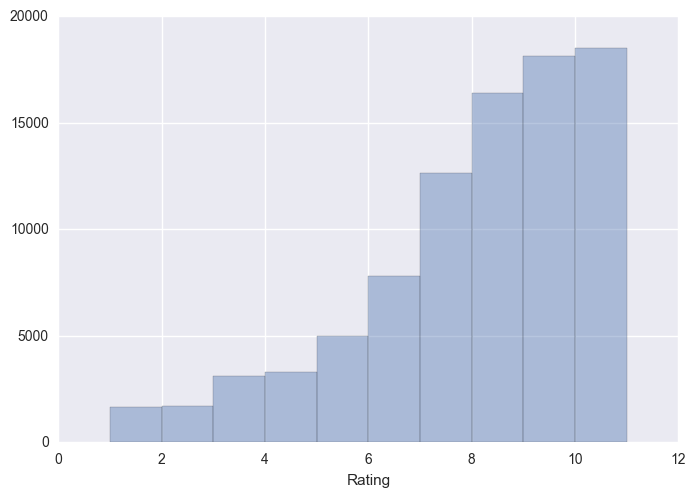

In [57]:
sns.distplot(df1["Rating"], bins = range(0,12,1), kde = False)

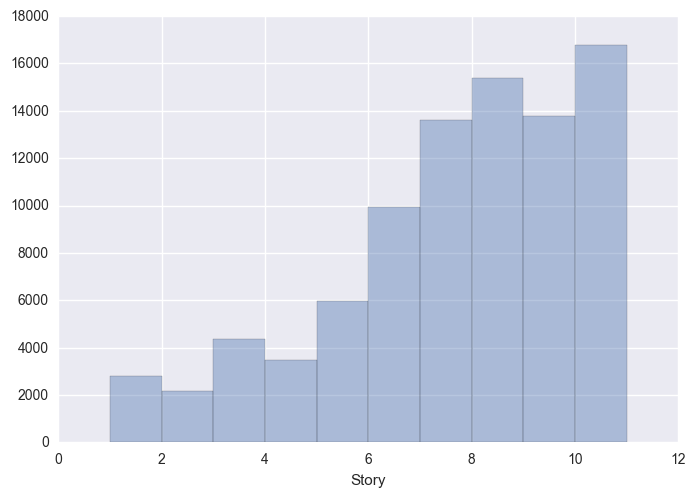

In [58]:
sns.distplot(df1["Story"], bins = range(0,12,1), kde = False)

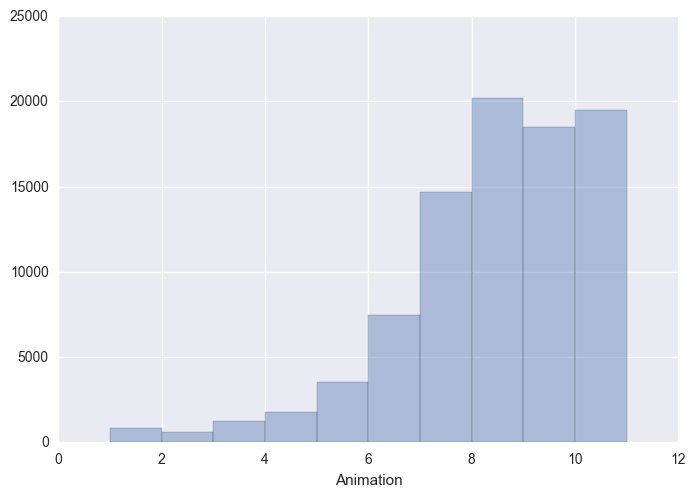

In [59]:
sns.distplot(df1["Animation"], bins = range(0,12,1), kde = False)

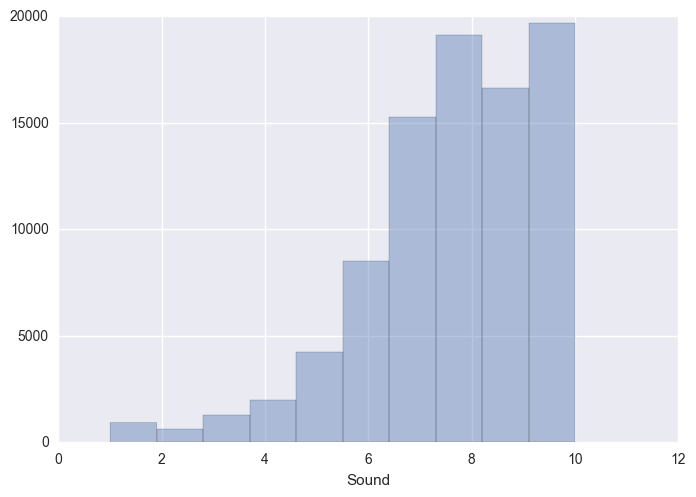

In [60]:
sns.distplot(df1["Sound"], bins = 10, kde = False)

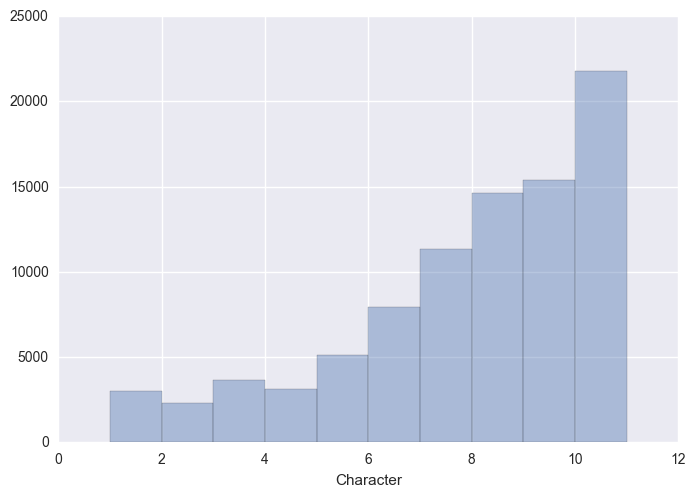

In [61]:
sns.distplot(df1["Character"], bins = range(0,12,1), kde = False)

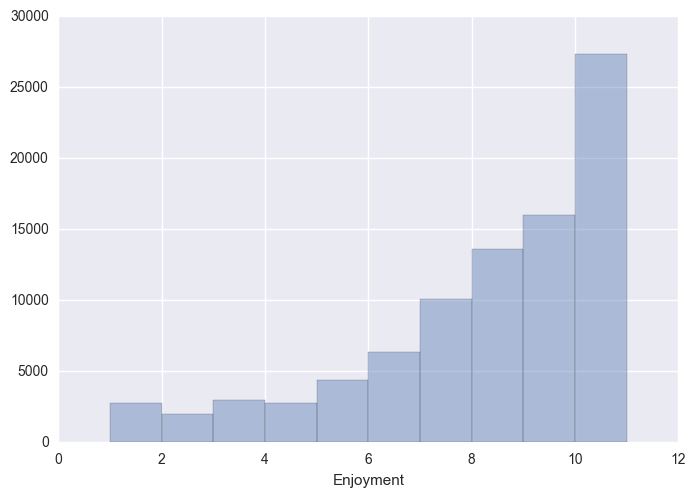

In [62]:
sns.distplot(df1["Enjoyment"], bins = range(0,12,1), kde = False)

### Apparently people don't generally like to write negative reviews on My Anime List.

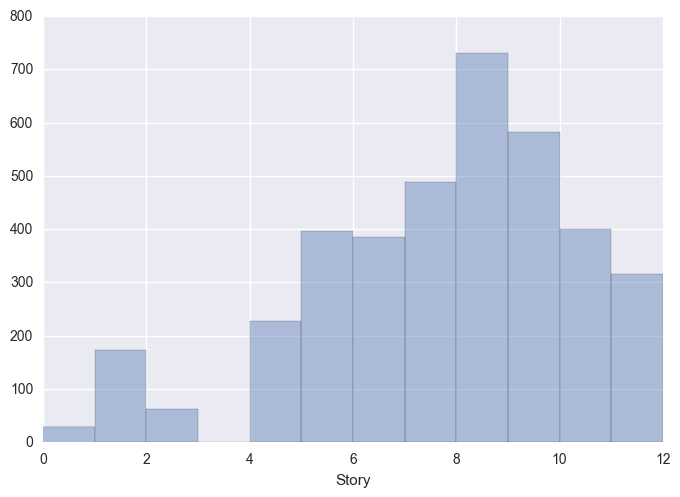

In [63]:
sns.distplot(df2["Story"].dropna(), bins = range(0,13,1), kde = False)

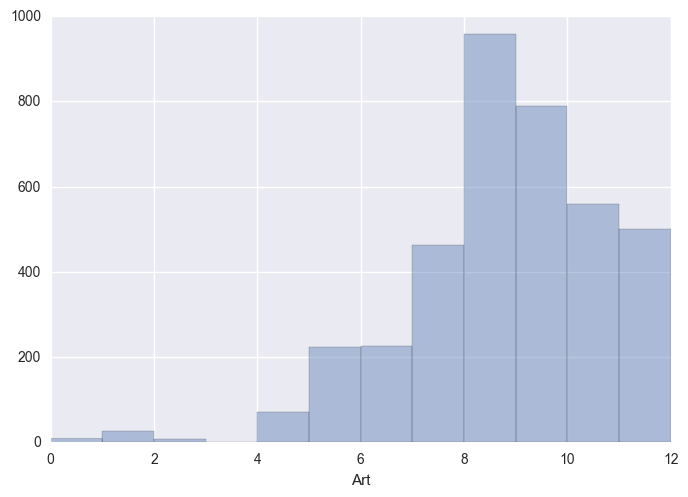

In [64]:
sns.distplot(df2["Art"].dropna(), bins = range(0,13,1), kde = False)

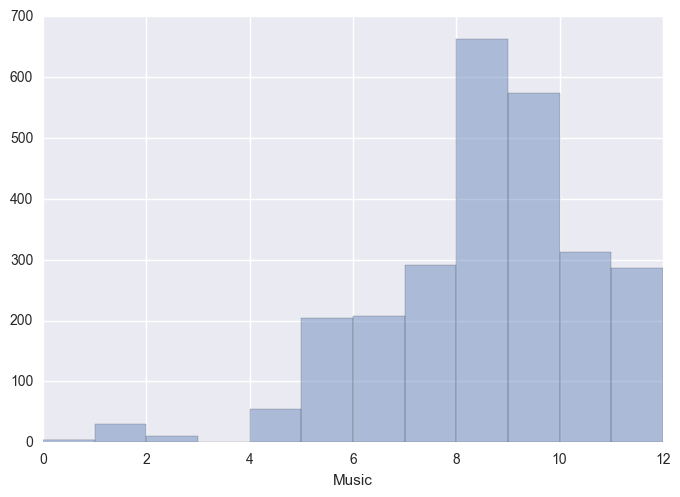

In [65]:
sns.distplot(df2["Music"].dropna(), bins = range(0,13,1), kde = False)

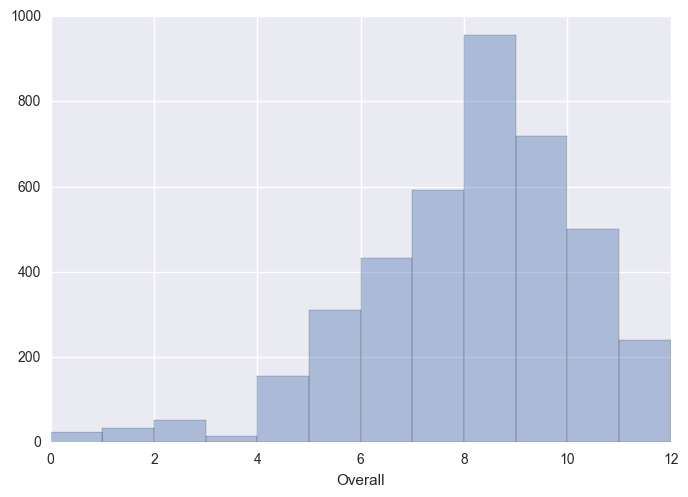

In [66]:
sns.distplot(df2["Overall"].dropna(), bins = range(0,13,1), kde = False)

### Reviews on Anime News Network aren't that positive. They're a little more balanced.

## Correlations between ratings

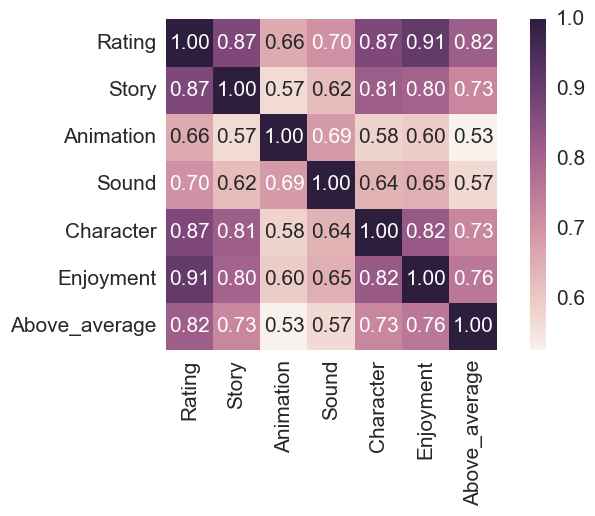

In [67]:
#My anime list
cols = ["Rating", "Story", "Animation", "Sound", "Character", "Enjoyment", "Above_average"]

import numpy as np
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

### Enjoyment seems to be the most important for My Anime List users.

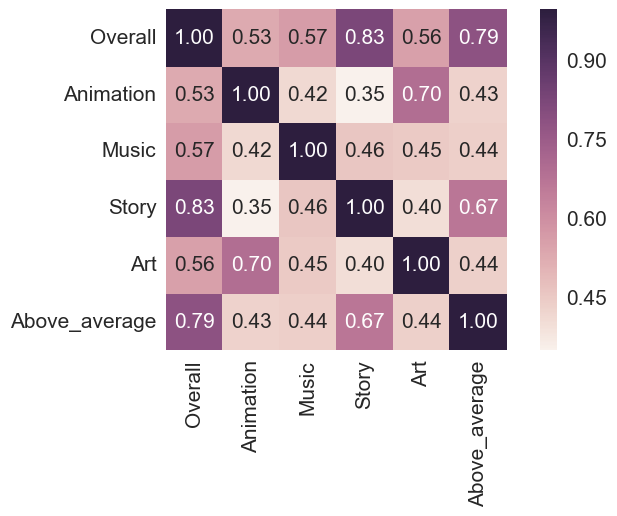

In [68]:
#Anime news netwrok
cols = ['Overall', 'Animation', 'Music', 'Story', 'Art', "Above_average"]

import numpy as np
cm = np.corrcoef(df2[cols].dropna().values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

### The story seems to be the most important this time.

## Exploring the text data

In [69]:
import nltk

In [70]:
ANN_Reviews = nltk.text.TextCollection(df2["Review"])

In [71]:
ANN_Reviews.collocations()

character designs; fan service; high school; second half; english dub;
sound effects; musical score; first volume; action scenes; first half;
character development; original japanese; feels like; english script;
voice actors; clean opener; magical girl; looks like; sailor moon;
dragon ball


In [72]:
MyAnimeList_Reviews = nltk.text.TextCollection(df1["Review"])

In [73]:
MyAnimeList_Reviews.collocations()

character development; main character; voice acting; high school; even
though; second season; main characters; character designs; first
season; voice actors; 've seen; pretty much; art style; fan service;
first episode; n't really; well done; code geass; ever seen; feel like


I don't really know how to comment this.

# Training a model

## Dividing the data

In [74]:
# dividing data into a training set and a final test set
# we're training the model on the My Anime List Reviews dataset. Reviews from Anime News Network are left for evaluation.
from sklearn.model_selection import train_test_split

X1 = df1["Review"].values
y1 = df1['Rating'].values

X_for_now, X_for_later, y_for_now, y_for_later = train_test_split(X1, y1, test_size = 0.1)

In [75]:
X_for_now.shape

(79429,)

In [76]:
# dividing data further into a training set and a test set
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_for_now, y_for_now, test_size = 0.1)

## Transforming list of words into frequency vectors

In [77]:
# How to change lists of words into vectors
from sklearn.feature_extraction.text import TfidfVectorizer

def identity(x):
    return x

tfidf = TfidfVectorizer(tokenizer = identity, 
                        lowercase = False,
                        
                        ngram_range = (1,2),
                        use_idf = False,
                        min_df = 0.013, #0.03  <--- The most important parameter
                        #max_df = 1.0
                        #max_features = 1000   
                       )

In [78]:
X_train = tfidf.fit_transform(X_train_raw)
X_test = tfidf.transform(X_test_raw)

In [79]:
# How many word types are we feeding to our machine learning algorithm?
X_train.shape, X_test.shape

((71486, 6416), (7943, 6416))

In [80]:
# Are there enough words that are likely to express a positive or negative sentiment towards an anime?
"awful" in tfidf.vocabulary_.keys()

True

In [81]:
"poor" in tfidf.vocabulary_.keys()

True

In [82]:
"worst" in tfidf.vocabulary_.keys()

True

In [83]:
"very bad" in tfidf.vocabulary_.keys()

False

In [84]:
"very interesting" in tfidf.vocabulary_.keys()

True

In [85]:
tfidf.vocabulary_.keys()

dict_keys(['that people', 'worth the', 'stays', 'around ,', 'arc ,', 'neither', 'goes', 'of times', 'of', 'tension', 'entertaining .', ', now', 'the title', 'series of', 'person ,', 'it also', 'here .', 'there and', 'soon', 'color', 'place in', 'he just', 'flawless', 'protagonist ,', '. without', 'stick', "they 're", 'just so', 'helpful', 'music', ', which', "n't even", 'put into', 'animation is', 'set in', 'have their', 'mc', 'credit', 'developments', 'really well', 'this film', 'rewatch', 'will be', 'was just', 'job at', 'failed', 'get a', ', was', 'with some', 'her and', 'in both', 'nothing to', 'former', 'explaining', 'that good', 'whether or', 'in mind', 'these', 'anyone who', 'into', 'playing', 'high', 'then the', ', much', 'either ,', 'than', 'they go', 'i may', 'was well', 'hell ,', 'even more', 'directly', 'part of', 'thanks', 'above average', 'parts .', 'things are', 'kind of', ', a', 'animation .', 'a special', 'lighthearted', 'more of', 'dark ,', 'began', 'about his', 'beca

In [86]:
# just looking at an example review
' '.join(X_train_raw[10])

"`` hey gingy , you like magical girl shows , right ? '' `` i sure do . '' `` what about this show called `` yuki yuna is a hero '' ? '' `` ok , what 's it like ? '' `` it 's a show that starts off innocent and sweet but the more you watch it , the more the characters begin to suffer and you can see the dark undertones of the show come out . '' `` hmmmm ... .are you referring to `` puella magi madoka magica '' ? my favorite anime of all time ? '' `` no , i 'm referring to `` yuki yuna '' . '' `` hmmm ... .hmmmmmm ... .hmmmmmmmmmmmmmmmmmmmm ... '' ok , all joking aside , i 'm not going to cast my eyes away and ignore the similarities between `` madoka magica '' and `` yuki yuna '' . i 'm also not going to be the one who wipes cheeto dust on my jeans and says that `` yuki yuna '' is a rip-off of `` madoka magica '' . despite the similarities , `` yuki yuna '' is still able to be its own thing . yeah , i liked this show . i was into it . i really loved the animation and i legitimately fel

In [87]:
y_train = y_train_raw
y_test = y_test_raw

## Hyperparameter tuning and training the model

In [88]:
# metric: 'is an anime rated above average?' classification accuracy

mean_rating = np.mean(y_train)
print(mean_rating)

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

def above_average_accuracy(y_true, y_predicted, **kwargs):
    if kwargs and 'average_true' in kwargs:
        average_true = kwargs['average_true']
    else:
        average_true = np.mean(y_true)
        
    if kwargs and 'average_predicted' in kwargs:
        average_predicted = kwargs['average_predicted']
    else:
        average_predicted = np.mean(y_predicted)
        
    return accuracy_score(np.array(y_true) > average_true, np.array(y_predicted) > average_predicted)

7.56563522928


In [89]:
# Hyperparameter tuning
import xgboost

xgb2 = xgboost.XGBRegressor( 
                # Hyperparameter tuning of the xgboost regressor
                
                # number of trees
                # early stopping
                n_estimators = 170,
    
                # learning rate
                learning_rate = 0.1,  
        
    
                # parameters regulating depth of trees
                 max_depth = 8, #12
                 min_child_weight = 10, #10
                 gamma = 0, 
                
    
                # l1 and l2 regularization
                 reg_lambda = 250, #150
                 reg_alpha = 50, #100
                
    
                # sampling
                colsample_bytree = 0.8,
                subsample = 0.8, 
                colsample_bylevel = 1
            )

In [90]:
best = xgb2.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], early_stopping_rounds = 20, verbose=True)
best.best_score, best.best_iteration, best.best_ntree_limit

[0]	validation_0-rmse:6.73515	validation_1-rmse:6.72591
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:6.13559	validation_1-rmse:6.12852
[2]	validation_0-rmse:5.60196	validation_1-rmse:5.59838
[3]	validation_0-rmse:5.12608	validation_1-rmse:5.12528
[4]	validation_0-rmse:4.70137	validation_1-rmse:4.70501
[5]	validation_0-rmse:4.32451	validation_1-rmse:4.33157
[6]	validation_0-rmse:3.9907	validation_1-rmse:4.00008
[7]	validation_0-rmse:3.69435	validation_1-rmse:3.70779
[8]	validation_0-rmse:3.43169	validation_1-rmse:3.44857
[9]	validation_0-rmse:3.19997	validation_1-rmse:3.22065
[10]	validation_0-rmse:2.99625	validation_1-rmse:3.02215
[11]	validation_0-rmse:2.81869	validation_1-rmse:2.84898
[12]	validation_0-rmse:2.66159	validation_1-rmse:2.69542
[13]	validation_0-rmse:2.52617	validation_1-rmse:2.56363
[14]	validation_0-rmse:2.40705	validation_1-rmse:2.448

(1.52253, 169, 170)

In [91]:
# Hyperparameter tuning: grid search and cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import xgboost


xgb = xgboost.XGBRegressor()



param_grid = {             
                # Hyperparameter tuning of the xgboost regressor
               
                # number of trees
                'n_estimators': [170],
                
                # learning rate
                'learning_rate': [0.1],  
        
    
                # parameters regulating depth of trees
                'max_depth': [8], 
                'min_child_weight': [10],  
                'gamma': [0], 
                
    
                # l1 and l2 regularization
                'reg_lambda': [250],
                'reg_alpha': [50], 
                
    
                # sampling
                'colsample_bytree': [0.8],  
                'subsample': [0.8],
                'colsample_bylevel': [1]
            }



gs = GridSearchCV(xgb, param_grid, 
                   #scoring = 'neg_mean_squared_error',
                   scoring = make_scorer(above_average_accuracy, greater_is_better=True, 
                                         average_predicted = mean_rating, average_true = mean_rating),
                   cv = 2, verbose = 20,
                   n_jobs= 1)

In [92]:
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] reg_lambda=250, n_estimators=170, max_depth=8, min_child_weight=10, colsample_bylevel=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=50, gamma=0, learning_rate=0.1 
[CV]  reg_lambda=250, n_estimators=170, max_depth=8, min_child_weight=10, colsample_bylevel=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=50, gamma=0, learning_rate=0.1, score=0.795093, total= 2.7min
[CV] reg_lambda=250, n_estimators=170, max_depth=8, min_child_weight=10, colsample_bylevel=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=50, gamma=0, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min remaining:    0.0s


[CV]  reg_lambda=250, n_estimators=170, max_depth=8, min_child_weight=10, colsample_bylevel=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=50, gamma=0, learning_rate=0.1, score=0.795568, total= 2.7min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.6min finished


0.795330554234
{'reg_lambda': 250, 'n_estimators': 170, 'max_depth': 8, 'min_child_weight': 10, 'colsample_bylevel': 1, 'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_alpha': 50, 'gamma': 0, 'learning_rate': 0.1}


## Metrics

In [93]:
# self-explanatory
y_train_pred = best.predict(X_train)
y_test_pred = best.predict(X_test)

In [94]:
# checking some metrics of the performance of the selected model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
print('above_average_accuracy train: %.3f, test: %.3f' % (
        above_average_accuracy(y_train, y_train_pred),
        above_average_accuracy(y_test, y_test_pred)))

MSE train: 1.754, test: 2.318
R^2 train: 0.644, test: 0.543
above_average_accuracy train: 0.830, test: 0.805


In [95]:
# residual plot is hard to read in this case
predicted_vs_true = pd.DataFrame({"True": y_test, "Predicted": y_test_pred})
predicted_vs_true["Difference"] = predicted_vs_true.apply(lambda x: abs(x[1] - x[0]), axis = 1)
predicted_vs_true.head(10)

,Predicted,True,Difference
0,7.847342,10.0,2.152658
1,9.523909,9.0,0.523909
2,8.503707,10.0,1.496293
3,4.015727,3.0,1.015727
4,6.865458,4.0,2.865458
5,8.233399,8.0,0.233399
6,9.248008,10.0,0.751992
7,6.499593,10.0,3.500407
8,6.901162,2.0,4.901162
9,6.761903,9.0,2.238097


In [96]:
predicted_vs_true.describe()

,Predicted,True,Difference
count,7943.000000,7943.000000,7943.000000
mean,7.548197,7.542238,1.144857
std,1.527124,2.253445,1.003756
min,0.488799,1.000000,0.000257
25%,6.712650,6.000000,0.419442
50%,7.802057,8.000000,0.895076
75%,8.636601,9.000000,1.564620
max,11.141141,10.000000,7.389641


## Exploring examples

In [97]:
# Sanity check

sanity_check = pd.Series(["That anime was great!", "That was very bad anime."])
sanity_check = sanity_check.map(preprocess_text)
sanity_check = tfidf.transform(sanity_check)
best.predict(sanity_check)

array([ 8.90346432,  6.01804447], dtype=float32)

In [98]:
# the best predictions
predicted_vs_true.sort_values(by = "Difference").head(10)

,Predicted,True,Difference
5253,6.000257,6.0,0.000257
5259,7.999672,8.0,0.000328
2837,8.000427,8.0,0.000427
1416,3.000676,3.0,0.000676
538,6.000759,6.0,0.000759
2935,7.001202,7.0,0.001202
6065,8.998242,9.0,0.001758
7505,6.001954,6.0,0.001954
989,8.002073,8.0,0.002073
2788,7.996386,8.0,0.003614


In [99]:
# average predictions
predicted_vs_true.sort_values(by = "Difference")[5000:5010]

,Predicted,True,Difference
6722,6.795934,8.0,1.204066
5643,2.795833,4.0,1.204167
3500,7.795629,9.0,1.204371
4269,6.794787,8.0,1.205213
1836,6.794410,8.0,1.205590
7905,8.793358,10.0,1.206642
1087,8.793314,10.0,1.206686
2315,6.792149,8.0,1.207851
1033,6.792149,8.0,1.207851
5899,8.207945,7.0,1.207945


In [100]:
# the worst predictions
predicted_vs_true.sort_values(by = "Difference", ascending = False).head(10)

,Predicted,True,Difference
1114,8.389641,1.0,7.389641
1685,8.347402,1.0,7.347402
2560,8.299134,1.0,7.299134
7261,8.275214,1.0,7.275214
4559,7.998614,1.0,6.998614
7439,7.951441,1.0,6.951441
6860,7.863489,1.0,6.863489
2972,7.698745,1.0,6.698745
1894,7.679674,1.0,6.679674
5297,7.608088,1.0,6.608088


In [102]:
# looking at examples
print(' '.join(X_test_raw[6722]))

a nice mix of romcom and slice of life with pretty animation – / plot : based on a key visual novel the plot is pretty standard stuff . main lead with comedy sidekick is surrounded by pretty girls who all seem to fall in love with him . but clannad manages to avoid most of the pitfalls of the harem genre and proves its self to be really entertaining ! it doesn’t make the mistake of trying to cover every girls arc from the visual novel , instead nagisa is quite obviously the main girl from the start – tomoya only really has eyes for her and the other girls quickly realise that and so there are no irritating love triangles . instead clannad plays up the comedy and slice of life side of the story – and its really well done . i enjoyed most of the episodes ( apart from the pointless fuuko retarded-moe moments ! ) and found the characters likeable . in particular i found tomoya to be a decent lead – he’s got a bit of depth and his own backstory , plus i found him to be well scripted and act

In [103]:
# worst predicted
print(' '.join(X_test_raw[1114]))

this show , called flame of recca , is a ridiculously retarded version of yu yu hakusho . i will give credit where credit is due : they did a great job of combining hiei and kurama into one character , tokiya mikagami . but other than him , this pitiful mistake of a show is unworthy to be deemed an anime .


In [108]:
print(' '.join(X_test_raw[1685]))

this anime gave me over nose bleeders i wecamend you watch dis anime because nosebleeds is a part of nature , the charecters were great but i have a hard time taking yamada seriously when she flashes her pantalooneys it had a good story between yamada and that one faggot dude who likes manga porn `` ovi '' i really like that one girl with the glasses i wish that they would hit it up at the love hotel personaly the boobs were not as glossy as i thought they would be but i mean they did have a low budget however ? i really love sword art online i like the charecters and the music anyway this anime is great i would wecamend that you get a that you watch it in p hd the trees look like leafyishere am i rgiht x-ddeeeee i really hope that this review will help you wan na watch this anime and a love why ? -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -thememerhimself drad


In [109]:
print(' '.join(X_test_raw[2560]))

this anime is beyond anything that can be conceive by the normal mind . some people love this anime with passion while others hate it with pride . just know that this anime is beyond sickening and corrupted . it is pure evil .


In [110]:
# best predicted
print(' '.join(X_test_raw[5259]))

story : i really like the premise of this even though it 's not really my style- very science fiction , and i 'm not super into that . it 's gory as well . so basically , this kid gets infested with this parasite that 's supposed to manifest in his brain but instead ends up in his hand . the parasite can only control his hand but other people infected usually get completely taken over and the human body becomes a host for the parasite- rendering the human basically gone , but the body continuing on with the parasite as it 's host . now these parasites have one goal- eat humans . see how this could get interesting ? i also really enjoyed the character development as well- the main character goes through some pretty dark stuff , and it actually reflects in the way his character behaves , and even looks . it 's pretty interesting . the story itself takes a lot of twists and turns , but the arcs all connect pretty nicely . i did n't really find a dull moment in this anime ! art : it 's oka

## Feature importances

In [111]:
# Which words our xgboost model considers important? 
inv_vocabulary = {number: word for word, number in tfidf.vocabulary_.items()}
feature_importances = pd.DataFrame({'importances': best.feature_importances_, 'features': pd.Series(inv_vocabulary)})

In [112]:
feature_importances.sort_values(by = 'importances', ascending = False).head(40)

,features,importances
6075,well,0.006754
2512,great,0.006598
6347,you,0.006443
3820,no,0.005667
3199,just,0.004968
947,any,0.004891
1954,enjoyed,0.004813
1716,definitely,0.004813
5916,very,0.004658
1151,bad,0.004658


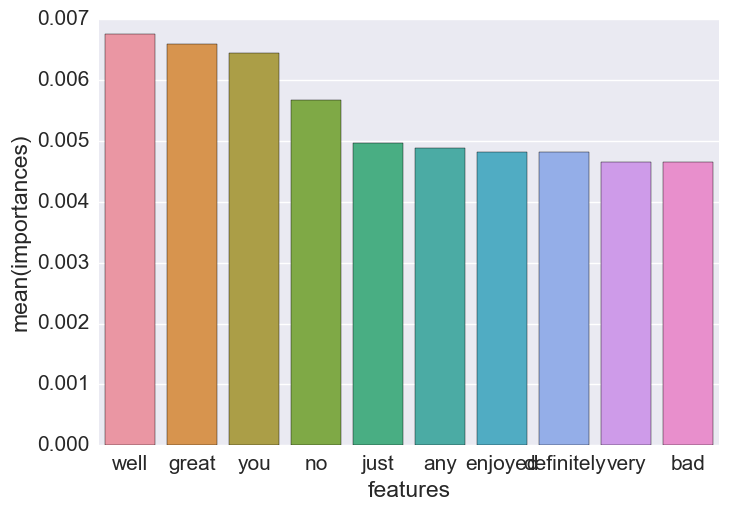

In [113]:
sns.barplot(x= 'features', y = 'importances', data = feature_importances.sort_values(by = 'importances', ascending = False)[:10])
plt.show()

## Learning curve

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from 'C:\\Users\\SmilingAtheist\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

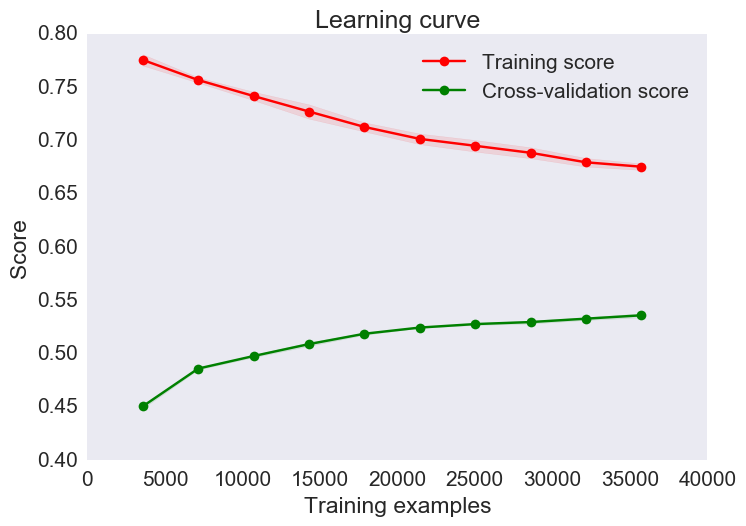

In [115]:
# just plotting a regular learning curve
plot_learning_curve(best, "Learning curve", X_train, y_train, cv=2,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10))

# Evaluation on the Anime News Network Reviews dataset and on the unseen part of the My Anime List Reviews dataset

In [116]:
# retraining the model on the whole for_now dataset
X_for_now_transformed = tfidf.fit_transform(X_for_now) 
best.fit(X_for_now_transformed, y_for_now)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=10, missing=None, n_estimators=170, nthread=-1,
       objective='reg:linear', reg_alpha=50, reg_lambda=250,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [117]:
# Now we're using the final test set left for later
X_for_later_transformed = tfidf.transform(X_for_later)

In [118]:
y_for_now_pred = best.predict(X_for_now_transformed)
y_for_later_pred = best.predict(X_for_later_transformed)

In [119]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, unseen data: %.3f' % (
        mean_squared_error(y_for_now, y_for_now_pred),
        mean_squared_error(y_for_later, y_for_later_pred)) )
print('R^2 train: %.3f, unseen data: %.3f' % (
        r2_score(y_for_now, y_for_now_pred),
        r2_score(y_for_later, y_for_later_pred)))
print('above_average_accuracy train: %.3f, unseen data: %.3f' % (
        above_average_accuracy(y_for_now, y_for_now_pred),
        above_average_accuracy(y_for_later, y_for_later_pred)))

MSE train: 1.791, unseen data: 2.246
R^2 train: 0.638, unseen data: 0.553
above_average_accuracy train: 0.828, unseen data: 0.805


In [120]:
# And now we're cheking how well does our model generalize to reviews from a different website (Anime News Network)
y_ANN_pred = best.predict(tfidf.transform(df2["Review"]))
y_ANN = df2["Overall"]

In [121]:
print('above_average_accuracy on Anime News Network Reviews: %.3f' % above_average_accuracy(y_ANN, y_ANN_pred) )

above_average_accuracy on Anime News Network Reviews: 0.723
